In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from pysindy import SINDy

In [ ]:
# Lorenz system dynamics
def lorenz(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [ ]:
# Parameters for the Lorenz system
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0
initial_conditions = [1.0, 0.0, 0.0]
t_span = (0, 40)
t_eval = np.linspace(*t_span, 10000)

In [ ]:
# Integrate the Lorenz system
sol = solve_ivp(lorenz, t_span, initial_conditions, args=(sigma, rho, beta), t_eval=t_eval)

In [ ]:
# Extract data
t = sol.t
xyz = sol.y.T  # Shape (n_samples, n_features)

In [ ]:
# Initialize SINDy model
model = SINDy(feature_names=['x', 'y', 'z'])

In [ ]:
# Fit the model to the data
model.fit(xyz, t=t)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['x', 'y', 'z'],
      optimizer=STLSQ())

In [ ]:
# Print the SINDy model
print(model)
# Obtain the sparse regression matrix
print("SINDy Coefficients:")
coeff = model.coefficients()
print(coeff.T)
# Visualize the model
model.print()

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['x', 'y', 'z'],
      optimizer=STLSQ())
SINDy Coefficients:
[[  0.           0.           0.        ]
 [-10.00092733  27.79928063   0.        ]
 [ 10.00099465  -0.95356761   0.        ]
 [  0.           0.          -2.6653808 ]
 [  0.           0.           0.        ]
 [  0.           0.           0.99859991]
 [  0.          -0.99360954   0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]
(x)' = -10.001 x + 10.001 y
(y)' = 27.799 x + -0.954 y + -0.994 x z
(z)' = -2.665 z + 0.999 x y


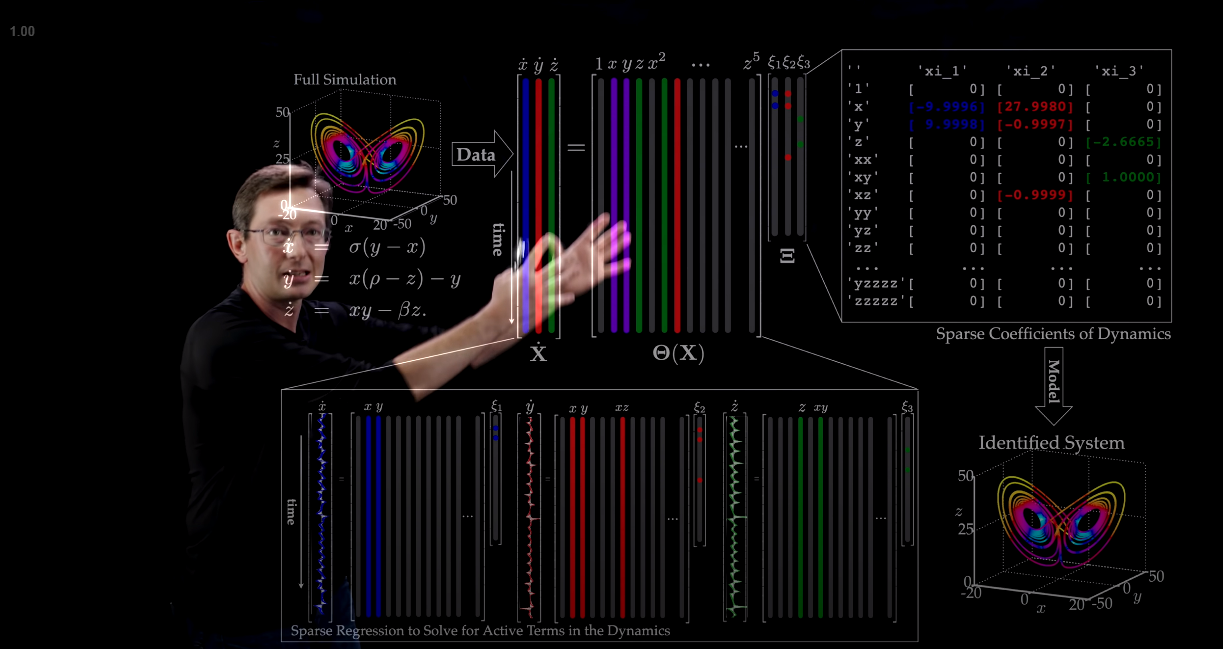

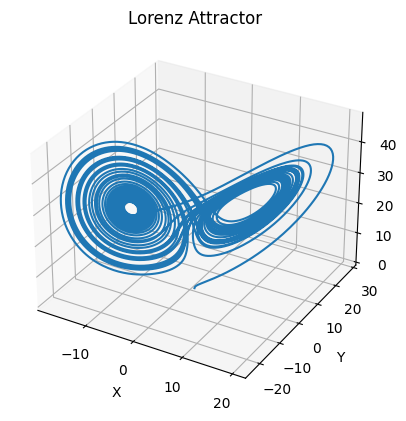

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the Lorenz attractor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xyz[:, 0], xyz[:, 1], xyz[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')

# Plot the identified dynamics
plt.figure()
plt.show()
